In [1]:
import pandas as pd
import json
import os

base_path = r"C:\Users\Alper Ilgın\Desktop\bitime projesi\bitime projesi"

def load_and_process_jsonl(file_name):
    file_path = os.path.join(base_path, file_name)
    with open(file_path, 'r', encoding='utf-8') as f:
        data = [json.loads(line) for line in f]
    df = pd.DataFrame(data)
    df = df[['rating', 'text']].dropna()
    df['sentiment'] = df['rating'].apply(lambda x: 'positive' if x >= 3 else 'negative')
    return df

all_beauty_file = "All_Beauty.jsonl"
digital_music_file = "Digital_Music.jsonl"
health_care_file = "Health_and_Personal_Care.jsonl"

all_beauty_reviews = load_and_process_jsonl(all_beauty_file)
digital_music_reviews = load_and_process_jsonl(digital_music_file)
health_care_reviews = load_and_process_jsonl(health_care_file)

print(all_beauty_reviews.head())
print(digital_music_reviews.head())
print(health_care_reviews.head())

   rating                                               text sentiment
0     5.0  This spray is really nice. It smells really go...  positive
1     4.0  This product does what I need it to do, I just...  positive
2     5.0                          Smells good, feels great!  positive
3     1.0                                     Felt synthetic  negative
4     5.0                                            Love it  positive
   rating                                               text sentiment
0     5.0  If i had a dollar for how many times I have pl...  positive
1     5.0  awesome sound - cant wait to see them in perso...  positive
2     5.0  This is a great cd. Good music and plays well....  positive
3     1.0  These are not real German singers, they have a...  negative
4     3.0  I first heard this playing in a Nagoya shop an...  positive
   rating                                               text sentiment
0     4.0  This review is more to clarify someone else’s ...  positive
1     

yukarıda sorguda kullanıcı yorumlarında puanlama 3 ve üstü olanları pozitif olmayanlarınegatif olarak değerlendiriyoruz

# Veri Setlerini Birleştirme ve hazırlama

In [2]:
from sklearn.model_selection import train_test_split

combined_reviews = pd.concat([all_beauty_reviews, digital_music_reviews, health_care_reviews], ignore_index=True)

train_data, test_data = train_test_split(combined_reviews, test_size=0.2, random_state=42)

print("Eğitim veri sayısı:", len(train_data))
print("Test veri sayısı:", len(test_data))

print(train_data.head())

Eğitim veri sayısı: 1060866
Test veri sayısı: 265217
         rating                                               text sentiment
356034      5.0  Usually don’t write reviews in items unless it...  positive
1014985     5.0  Super cool case and really fancy it was a gift...  positive
997855      5.0  I bought it to use under my apron (belly fold)...  positive
486387      4.0                                         I like it.  positive
325999      3.0  While the tattoos went on smoothly & looked gr...  positive


yukarıda 3 tane olan veri setlerini birleştirdim

eğtğm ve test olarak ayırma işlemi yaptım.

Eğitim veri setinden alınan ilk 5 satır, verilerin doğru bir şekilde birleştirildiğini veetiketlendiğini doğruluyor.

In [5]:
combined_reviews = pd.concat([all_beauty_reviews, digital_music_reviews, health_care_reviews], ignore_index=True)

pd.concat: Bu fonksiyon, verilen veri setlerini birleştirir.
[all_beauty_reviews, digital_music_reviews, health_care_reviews]: Birleştirilecek üç farklı kategoriye ait veri setleri.
ignore_index=True: Eski indeksleri sıfırlayıp yeni bir indeks oluşturur

In [8]:
# Veriyi Karıştırma ve Train-Test Ayırma

In [9]:
train_data, test_data = train_test_split(combined_reviews, test_size=0.2, random_state=42)

train_test_split: Veriyi ikiye bölen bir sklearn fonksiyonudur:
combined_reviews: Ayırmak istediğimiz veri seti.
test_size=0.2: Test veri setine toplam verinin %20'sini ayırır. Geri kalan %80, eğitim veri setine atanır.
random_state=42: Karıştırmayı sabit bir şekilde yapar. Aynı sonuçları her çalıştırmada almak için bu sabit kullanılır.

In [10]:
# Eğitim ve Test Veri Sayısını Kontrol Etme

In [11]:
print("Eğitim veri sayısı:", len(train_data))
print("Test veri sayısı:", len(test_data))

Eğitim veri sayısı: 1060866
Test veri sayısı: 265217


# Ön işleme

In [3]:
# Metin temizleme

Önce metin temizliği yapacağım, yorumlardaki gereksiz öğeleri kaldırarak daha temiz bir veri oluşturacağım

In [4]:
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

def clean_text(text):
    text = text.lower()  
    text = re.sub(r'[^\w\s]', '', text) 
    text = re.sub(r'\d+', '', text)  
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words) 
    return text

train_data['cleaned_text'] = train_data['text'].apply(clean_text)
test_data['cleaned_text'] = test_data['text'].apply(clean_text)

print(train_data[['text', 'cleaned_text']].head())

[nltk_data] Downloading package stopwords to C:\Users\Alper
[nltk_data]     Ilgın\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                      text  \
356034   Usually don’t write reviews in items unless it...   
1014985  Super cool case and really fancy it was a gift...   
997855   I bought it to use under my apron (belly fold)...   
486387                                          I like it.   
325999   While the tattoos went on smoothly & looked gr...   

                                              cleaned_text  
356034   usually dont write reviews items unless amazes...  
1014985  super cool case really fancy gift friends real...  
997855   bought use apron belly fold painful rash like ...  
486387                                                like  
325999   tattoos went smoothly looked great costumed ch...  


cleaned_text: Yorumların temizlenmiş versiyonlarını içerir.
Bu işlem, metni daha düzenli ve makine öğrenmesi için daha uygun hale getirir.

Temizleme işlemi ile tüm harfleri küçük harflere çevirdim, noktalama işlemelerini veduraklama işaretlerini kaldırdım, metinde sayılar var ise onlarıda kaldırdım

In [1]:
# Sayısallaştırma

Makina öğrenmesini randımanlı yapmak için metin verisini TF-IDF yöntemi ile sayısal formadönüştürüyorum. EN sık geçen 5000 kelime ile bunu yapacağım.

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_data['cleaned_text'])
X_test = vectorizer.transform(test_data['cleaned_text'])

y_train = train_data['sentiment']
y_test = test_data['sentiment']

print("TF-IDF özellik sayısı:", X_train.shape[1])
print("Örnek TF-IDF vektörü:", X_train[0])


TF-IDF özellik sayısı: 5000
Örnek TF-IDF vektörü:   (0, 4125)	0.1773566461888449
  (0, 1888)	0.20916064148479607
  (0, 566)	0.1195699979443427
  (0, 4942)	0.13893085631490962
  (0, 1101)	0.1312818796375591
  (0, 3988)	0.17018634953933892
  (0, 4423)	0.1554997264875256
  (0, 1814)	0.09138756832135984
  (0, 3423)	0.103795406980149
  (0, 3693)	0.2084323699038025
  (0, 275)	0.24852759094943694
  (0, 4014)	0.14681164732317895
  (0, 1684)	0.1436426091887873
  (0, 1581)	0.17666317278306223
  (0, 4008)	0.26863613403054293
  (0, 3989)	0.22618575616909922
  (0, 1170)	0.1393566018985022
  (0, 2269)	0.23045346648712342
  (0, 4617)	0.16147622482635765
  (0, 4973)	0.13488126479101042
  (0, 2876)	0.19750604944442476
  (0, 276)	0.29305123256535864
  (0, 2207)	0.27400385097475627
  (0, 4670)	0.193277852864827
  (0, 2205)	0.1861545381557498
  (0, 3570)	0.16107177475491644
  (0, 4959)	0.20668591832635838
  (0, 1240)	0.1095644834614025
  (0, 4710)	0.1741324993323327


# Modelleme

In [6]:
# Logistic Regression Modeli

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict(X_test)

print("Logistic Regression Performansı:")
print(classification_report(y_test, y_pred_logistic))
print("Karışıklık Matrisi:")
print(confusion_matrix(y_test, y_pred_logistic))

Logistic Regression Performansı:
              precision    recall  f1-score   support

    negative       0.79      0.64      0.71     50369
    positive       0.92      0.96      0.94    214848

    accuracy                           0.90    265217
   macro avg       0.86      0.80      0.83    265217
weighted avg       0.90      0.90      0.90    265217

Karışıklık Matrisi:
[[ 32442  17927]
 [  8514 206334]]


In [9]:
# LSTM ile Sentiment Analizi

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Tokenizasyon ve Padding
LSTM modeline metni vermeden önce, metni sayısal değerlere dönüştürmemiz gerekiyor. Bunun için:

Tokenizasyon: Kelimeleri sayılara dönüştürür.
Padding: Tüm yorumları aynı uzunlukta olacak şekilde doldurur.

In [11]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data['cleaned_text'])

X_train_seq = tokenizer.texts_to_sequences(train_data['cleaned_text'])
X_test_seq = tokenizer.texts_to_sequences(test_data['cleaned_text'])

max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

y_train_encoded = train_data['sentiment'].map({'positive': 1, 'negative': 0}).values
y_test_encoded = test_data['sentiment'].map({'positive': 1, 'negative': 0}).values

LSTM Modelini Tanımlama
Şimdi bir LSTM modeli oluşturuyoruz. Modelin mimarisi:

Embedding Katmanı: Kelimelerin vektör temsillerini öğrenir.
LSTM Katmanı: Sıralı verilerdeki uzun vadeli bağımlılıkları yakalar.
Dense Katmanı: Çıkış sınıfını (pozitif/negatif) tahmin eder.

In [12]:
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=max_len),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

C:\Users\Alper Ilgın\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(
    X_train_pad, y_train_encoded,
    validation_data=(X_test_pad, y_test_encoded),
    epochs=3,
    batch_size=64,
    verbose=1
)

Epoch 1/3
16577/16577 ━━━━━━━━━━━━━━━━━━━━ 1441s 87ms/step - accuracy: 0.8154 - loss: 0.4705 - val_accuracy: 0.9033 - val_loss: 0.2314
Epoch 2/3
16577/16577 ━━━━━━━━━━━━━━━━━━━━ 1391s 84ms/step - accuracy: 0.9056 - loss: 0.2266 - val_accuracy: 0.9090 - val_loss: 0.2178
Epoch 3/3
16577/16577 ━━━━━━━━━━━━━━━━━━━━ 1383s 83ms/step - accuracy: 0.9123 - loss: 0.2098 - val_accuracy: 0.9111 - val_loss: 0.2111


In [14]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_lstm = (model.predict(X_test_pad) > 0.5).astype("int32")

print("LSTM Performansı:")
print(classification_report(y_test_encoded, y_pred_lstm))
print("Karışıklık Matrisi:")
print(confusion_matrix(y_test_encoded, y_pred_lstm))

8289/8289 ━━━━━━━━━━━━━━━━━━━━ 116s 14ms/step
LSTM Performansı:
              precision    recall  f1-score   support

           0       0.80      0.71      0.75     50369
           1       0.93      0.96      0.95    214848

    accuracy                           0.91    265217
   macro avg       0.87      0.83      0.85    265217
weighted avg       0.91      0.91      0.91    265217

Karışıklık Matrisi:
[[ 35683  14686]
 [  8902 205946]]


LSTM, Logistic Regression'a göre daha iyi bir doğruluk (%91) ve negatif sınıfta daha güçlü bir performans göstermiştir.

Eğer negatif yorumları doğru tahmin etmek bizim için daha önemliyse, LSTM modeli daha uygundur

Logistic Regression da oldukça iyi bir performans gösteriyor, ancak LSTM modelinin avantajı negatif sınıfta daha başarılı olmasıdır.

# Görsel Analiz

Word Cloud (Kelime Bulutu): Her kategoriye ait yorumlardan en sık kullanılan kelimeleri görselleştireceğiz.

Kategorilere göre ayrımı sağlamak için doğru birleştirme işlemi yapılacak ve ardından her kategori için ayrı Word Cloud oluşturulacak

In [23]:
# Veri Setlerini Kategorilere Göre Birleştirme

In [22]:
all_beauty_reviews['category'] = 'All_Beauty'
digital_music_reviews['category'] = 'Digital_Music'
health_care_reviews['category'] = 'Health_and_Personal_Care'

combined_reviews = pd.concat([all_beauty_reviews, digital_music_reviews, health_care_reviews], ignore_index=True)

print(combined_reviews.head())

   rating                                               text sentiment  \
0     5.0  This spray is really nice. It smells really go...  positive   
1     4.0  This product does what I need it to do, I just...  positive   
2     5.0                          Smells good, feels great!  positive   
3     1.0                                     Felt synthetic  negative   
4     5.0                                            Love it  positive   

     category  
0  All_Beauty  
1  All_Beauty  
2  All_Beauty  
3  All_Beauty  
4  All_Beauty  


In [24]:
# Her Kategori için Word Cloud Oluşturma

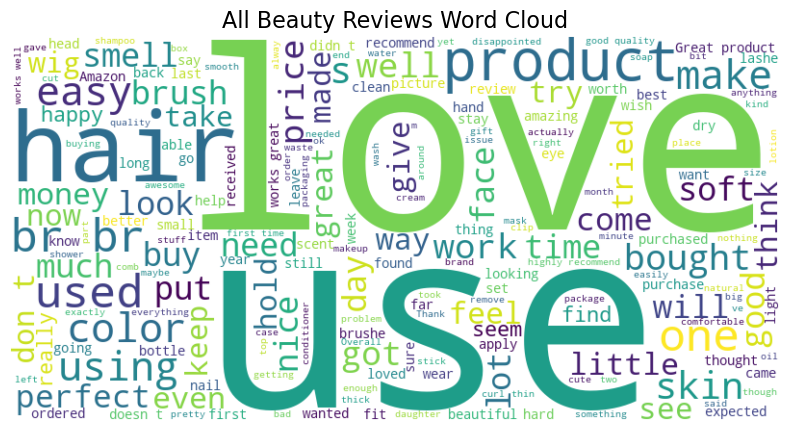

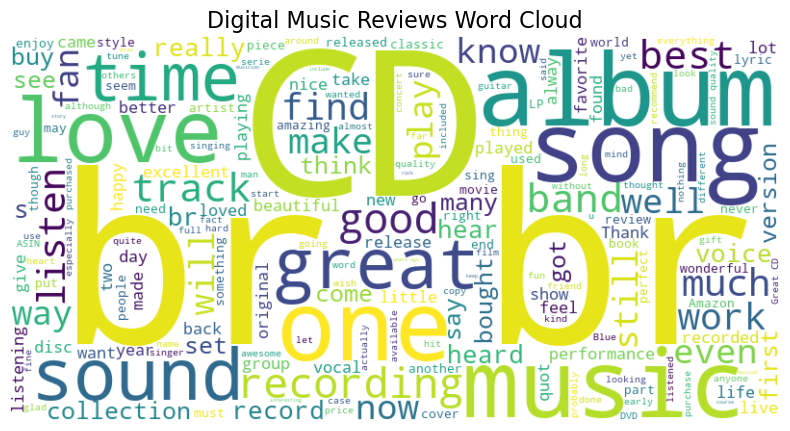

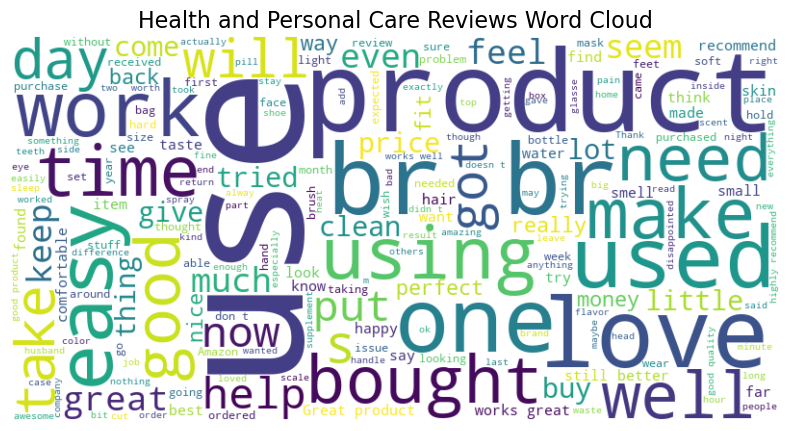

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(data, title):
    text = ' '.join(data['text'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

plot_wordcloud(combined_reviews[combined_reviews['category'] == 'All_Beauty'], "All Beauty Reviews Word Cloud")

plot_wordcloud(combined_reviews[combined_reviews['category'] == 'Digital_Music'], "Digital Music Reviews Word Cloud")

plot_wordcloud(combined_reviews[combined_reviews['category'] == 'Health_and_Personal_Care'], "Health and Personal Care Reviews Word Cloud")

Word Cloud'lar, her kategoriye özgü eğilimleri açıkça ortaya koyuyor.
Örneğin, All Beauty için "hair" ve "skin", Digital Music için "album" ve "song", Health and Personal Care için "work" ve "help" gibi kelimeler öne çıkıyor.

# Store Skorlama

Average_rating, sentiment analizi sonucu gelen olumlu ve olumsuz yorumlardan, rating_number değerinden bir skorlama yaparak başarılı mağazaları listeleyeceğiz.
Store başarı sıralaması yapılaca

In [30]:
print("Veri setindeki sütunlar:")
print(combined_reviews.columns)

print("\nVeri setinin ilk 5 satırı:")
print(combined_reviews.head())

Veri setindeki sütunlar:
Index(['rating', 'text', 'sentiment', 'category'], dtype='object')

Veri setinin ilk 5 satırı:
   rating                                               text sentiment  \
0     5.0  This spray is really nice. It smells really go...  positive   
1     4.0  This product does what I need it to do, I just...  positive   
2     5.0                          Smells good, feels great!  positive   
3     1.0                                     Felt synthetic  negative   
4     5.0                                            Love it  positive   

     category  
0  All_Beauty  
1  All_Beauty  
2  All_Beauty  
3  All_Beauty  
4  All_Beauty  


roduct_id veya store_id gibi bir sütun yok.
Mağaza veya ürün bazlı bir analiz yapamayız.
Kategori Bazlı Skorlama yapmak en doğru çözüm olacaktır

Bu yaklaşımda, kategorilere göre başarı skoru hesaplayacağız. Her kategori için:

Ortalama puanı (average_rating),
Toplam yorum sayısını (total_reviews),
Olumlu ve olumsuz yorum sayılarını bulacağız

In [31]:
category_scores = combined_reviews.groupby('category').agg(
    average_rating=('rating', 'mean'),
    total_reviews=('rating', 'count'),
    positive_reviews=('sentiment', lambda x: (x == 'positive').sum()),
    negative_reviews=('sentiment', lambda x: (x == 'negative').sum())
).reset_index()

category_scores['success_score'] = (
    category_scores['average_rating'] * 0.5 + 
    category_scores['positive_reviews'] / category_scores['total_reviews'] * 0.5
)

category_scores = category_scores.sort_values(by='success_score', ascending=False)

print(category_scores)

                   category  average_rating  total_reviews  positive_reviews  \
1             Digital_Music        4.532837         130434            121139   
2  Health_and_Personal_Care        3.996523         494121            395662   
0                All_Beauty        3.960245         701528            556414   

   negative_reviews  success_score  
1              9295       2.730787  
2             98459       2.398631  
0            145114       2.376696  


Digital Music kategorisi kullanıcılar tarafından en çok beğenilen ve yüksek başarı gösteren kategori olarak görünüyor.
All Beauty kategorisi ise yüksek yorum sayısına rağmen başarı puanı açısından geride kalmış